<a href="https://colab.research.google.com/github/deepak-raj007/Credit_risk_analysis/blob/main/Interim_II___Final_Hyperparameter_RFC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

import statsmodels.api as sm

from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from collections import Counter

from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Null Value Treated Data.csv')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,5831.78,5000.00,861.07,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,0.0,0.0,0.0,0.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,3003.65,2400.00,603.65,0.00,0.00,0.00,0.0,0.0,0.0,0.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,0.0,0.0,0.0,0.0
4,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,5631.38,5000.00,631.38,0.00,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269774 entries, 0 to 269773
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   269774 non-null  float64
 1   funded_amnt                 269774 non-null  float64
 2   funded_amnt_inv             269774 non-null  float64
 3   term                        269774 non-null  object 
 4   int_rate                    269774 non-null  float64
 5   installment                 269774 non-null  float64
 6   grade                       269774 non-null  object 
 7   sub_grade                   269774 non-null  object 
 8   emp_length                  269774 non-null  object 
 9   home_ownership              269774 non-null  object 
 10  annual_inc                  269774 non-null  float64
 11  verification_status         269774 non-null  object 
 12  loan_status                 269774 non-null  object 
 13  dti           

In [ ]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal'],
      dtype='object')

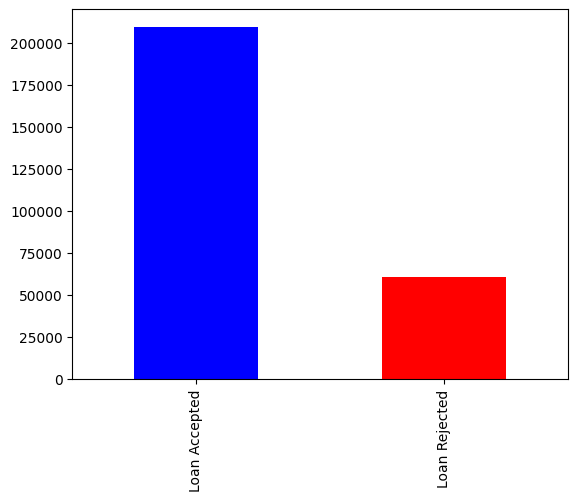

In [ ]:
df['loan_status'].value_counts().plot(kind = 'bar',color=['blue','red'])
plt.show()

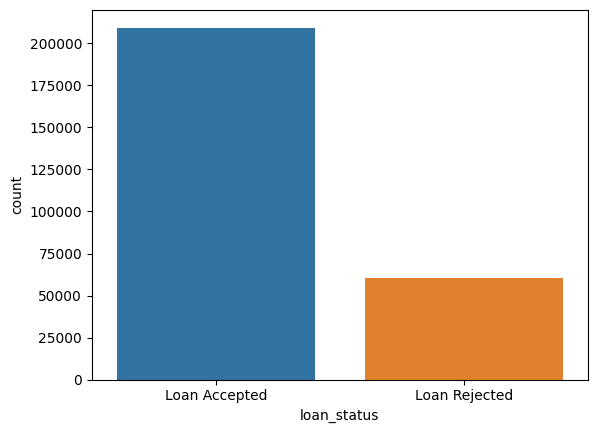

In [ ]:
sns.countplot(data=df,x='loan_status')
plt.show()

In [ ]:
df['loan_status'].value_counts()

Loan Accepted    209405
Loan Rejected     60369
Name: loan_status, dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(269774, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269774 entries, 0 to 269773
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   269774 non-null  float64
 1   funded_amnt                 269774 non-null  float64
 2   funded_amnt_inv             269774 non-null  float64
 3   term                        269774 non-null  object 
 4   int_rate                    269774 non-null  float64
 5   installment                 269774 non-null  float64
 6   grade                       269774 non-null  object 
 7   sub_grade                   269774 non-null  object 
 8   emp_length                  269774 non-null  object 
 9   home_ownership              269774 non-null  object 
 10  annual_inc                  269774 non-null  float64
 11  verification_status         269774 non-null  object 
 12  loan_status                 269774 non-null  object 
 13  dti           

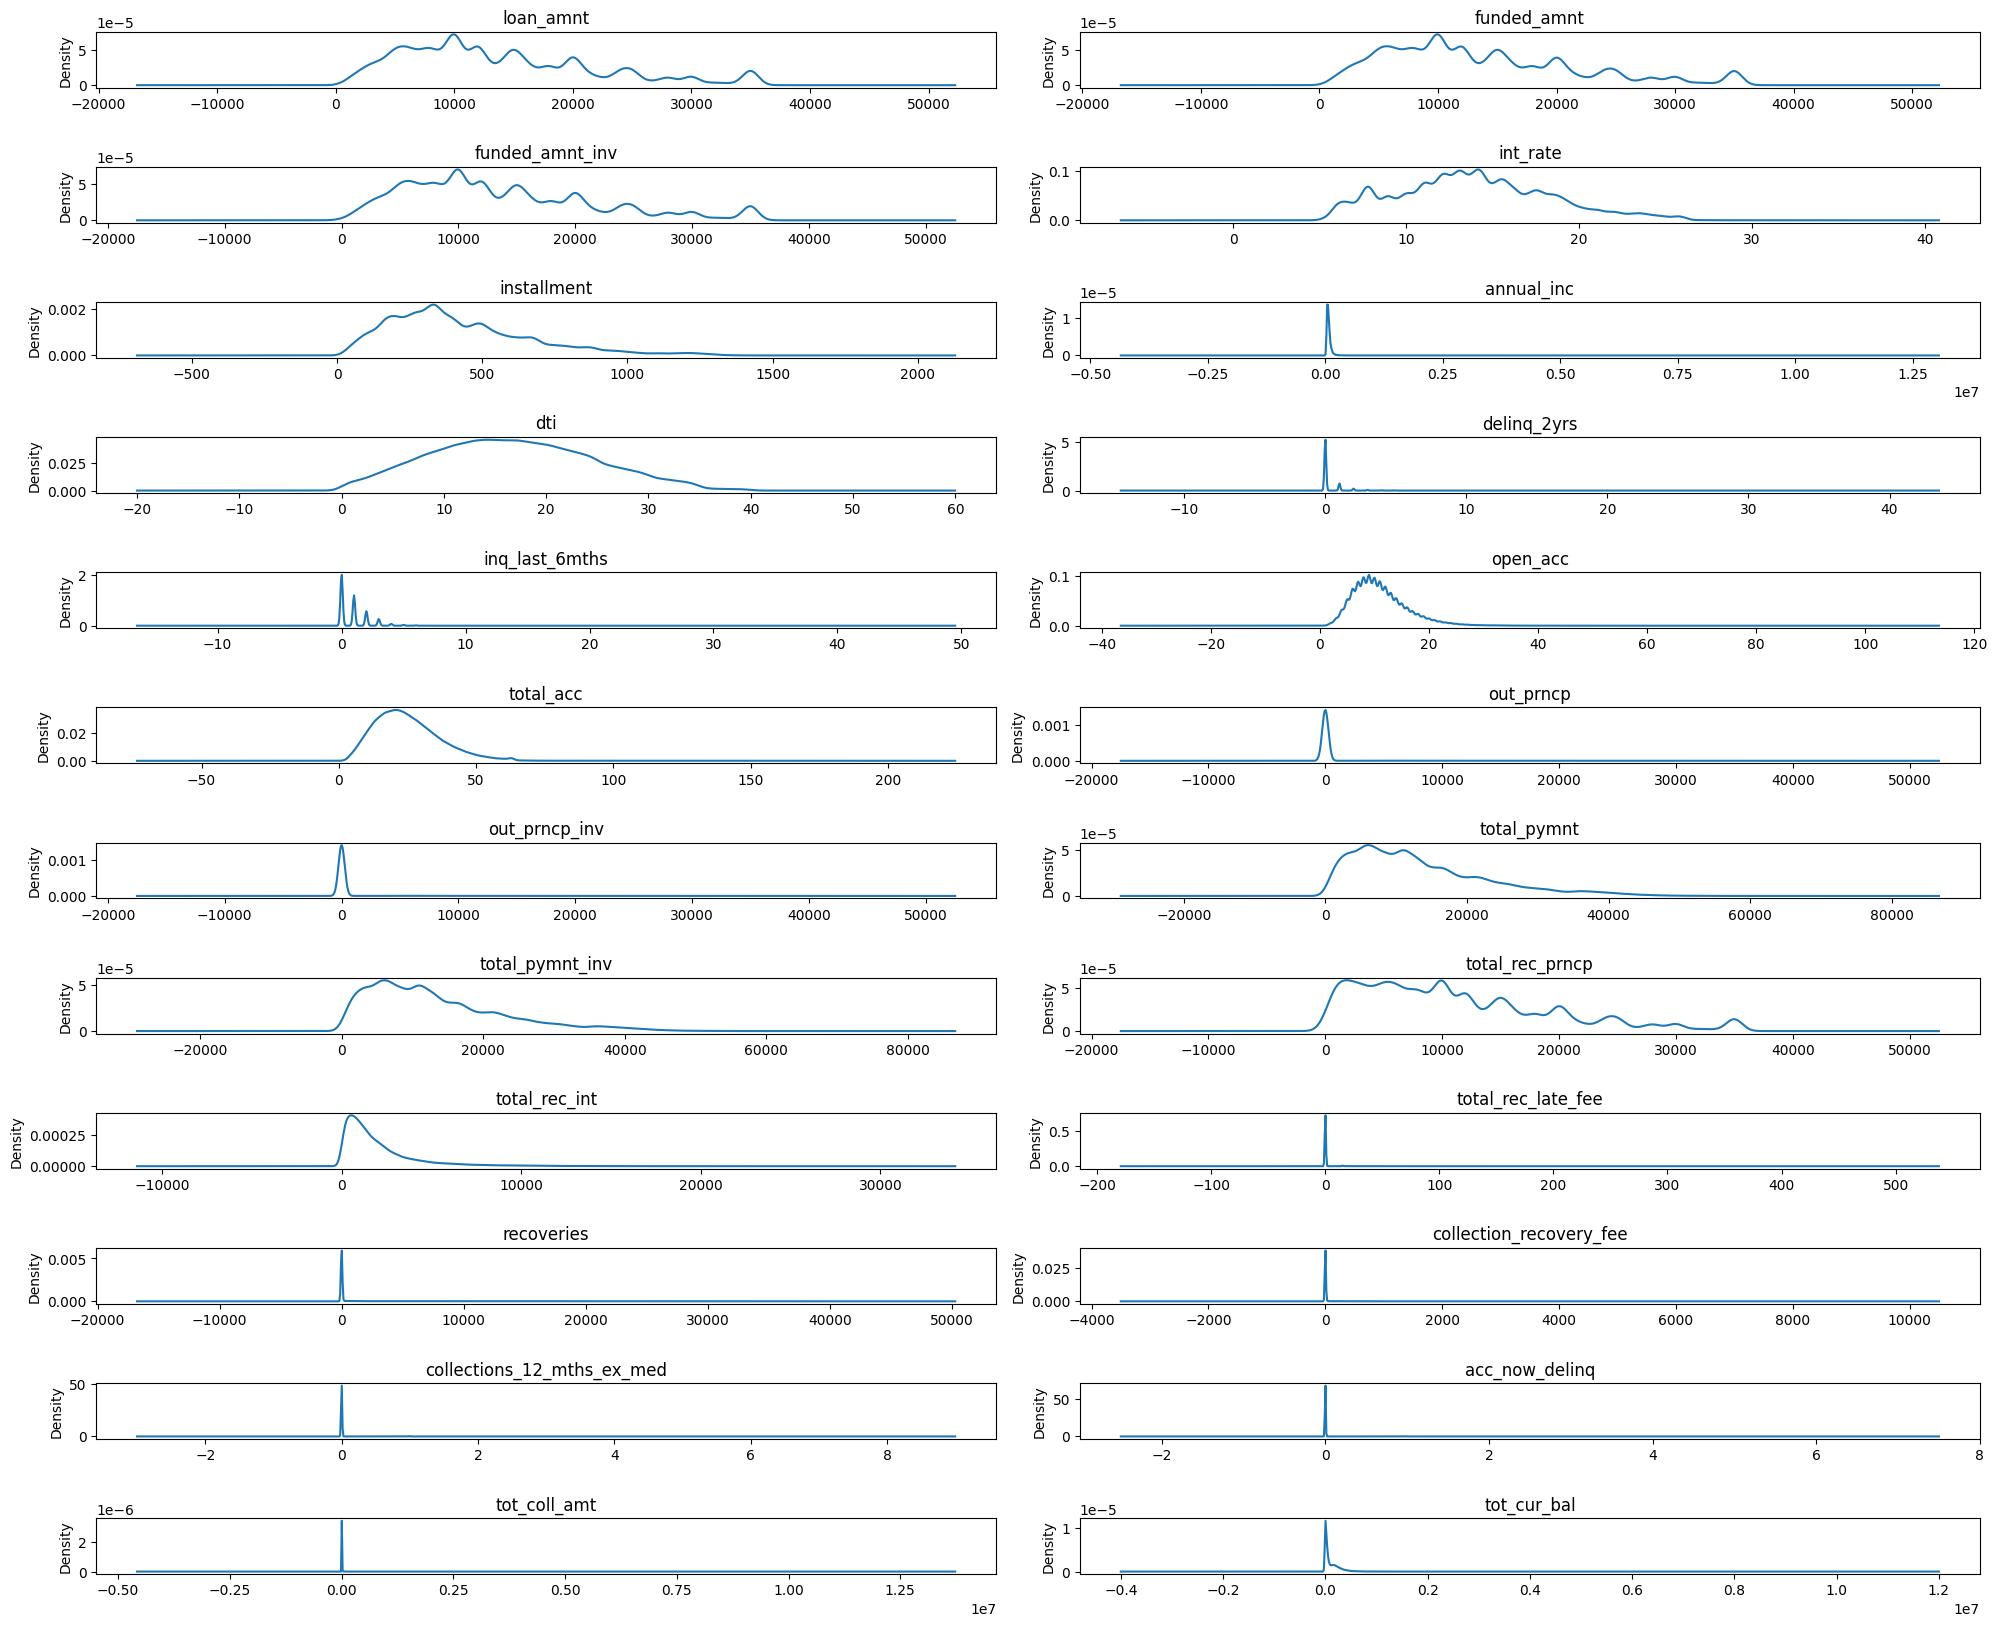

In [ ]:
nrows = 15
ncols = 2
iterator = 1
plt.figure(figsize = (20,20))
for i in df.select_dtypes(exclude = 'object').columns:
  plt.subplot(nrows,ncols,iterator)
  df[i].plot(kind = 'kde')
  plt.title(i)
  iterator+=1
plt.tight_layout()
plt.show()

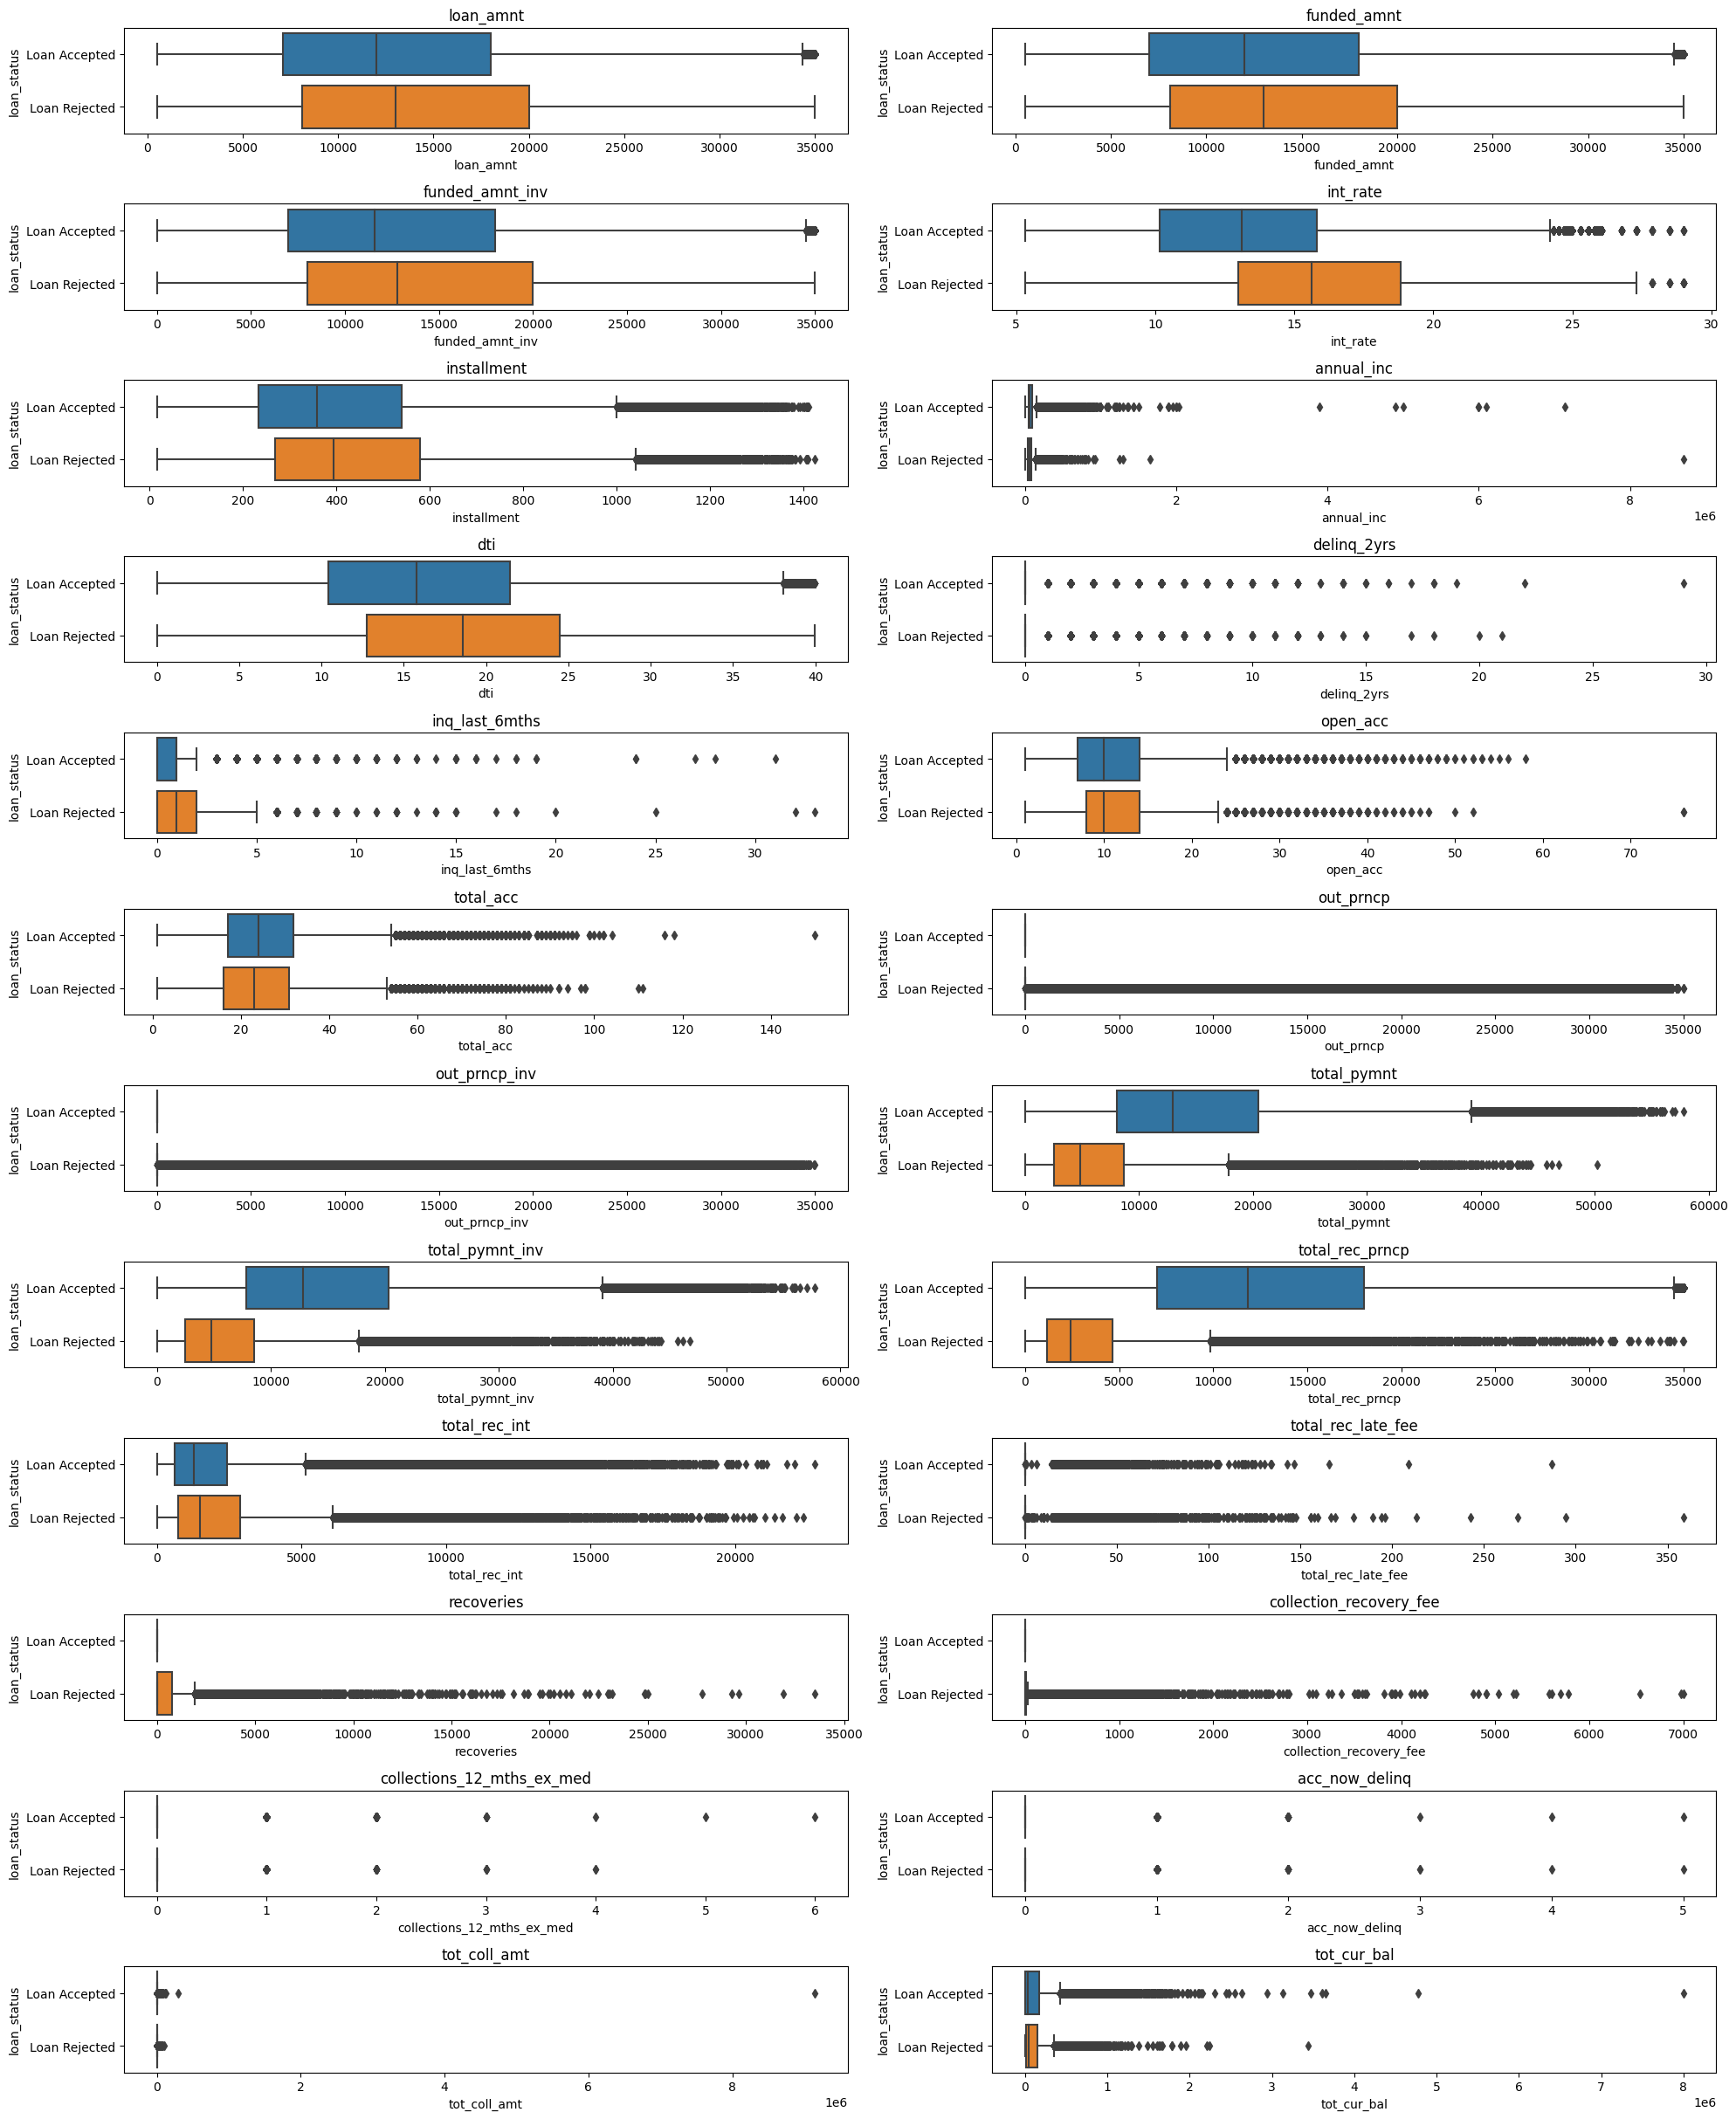

In [ ]:
nrows = 15
ncols = 2
iterator = 1
plt.figure(figsize = (20,30))
for i in df.select_dtypes(exclude = 'object').columns:
  plt.subplot(nrows,ncols,iterator)
  sns.boxplot(x = df[i], y = df['loan_status'])
  plt.title(i)
  iterator+=1
plt.tight_layout()
plt.show()

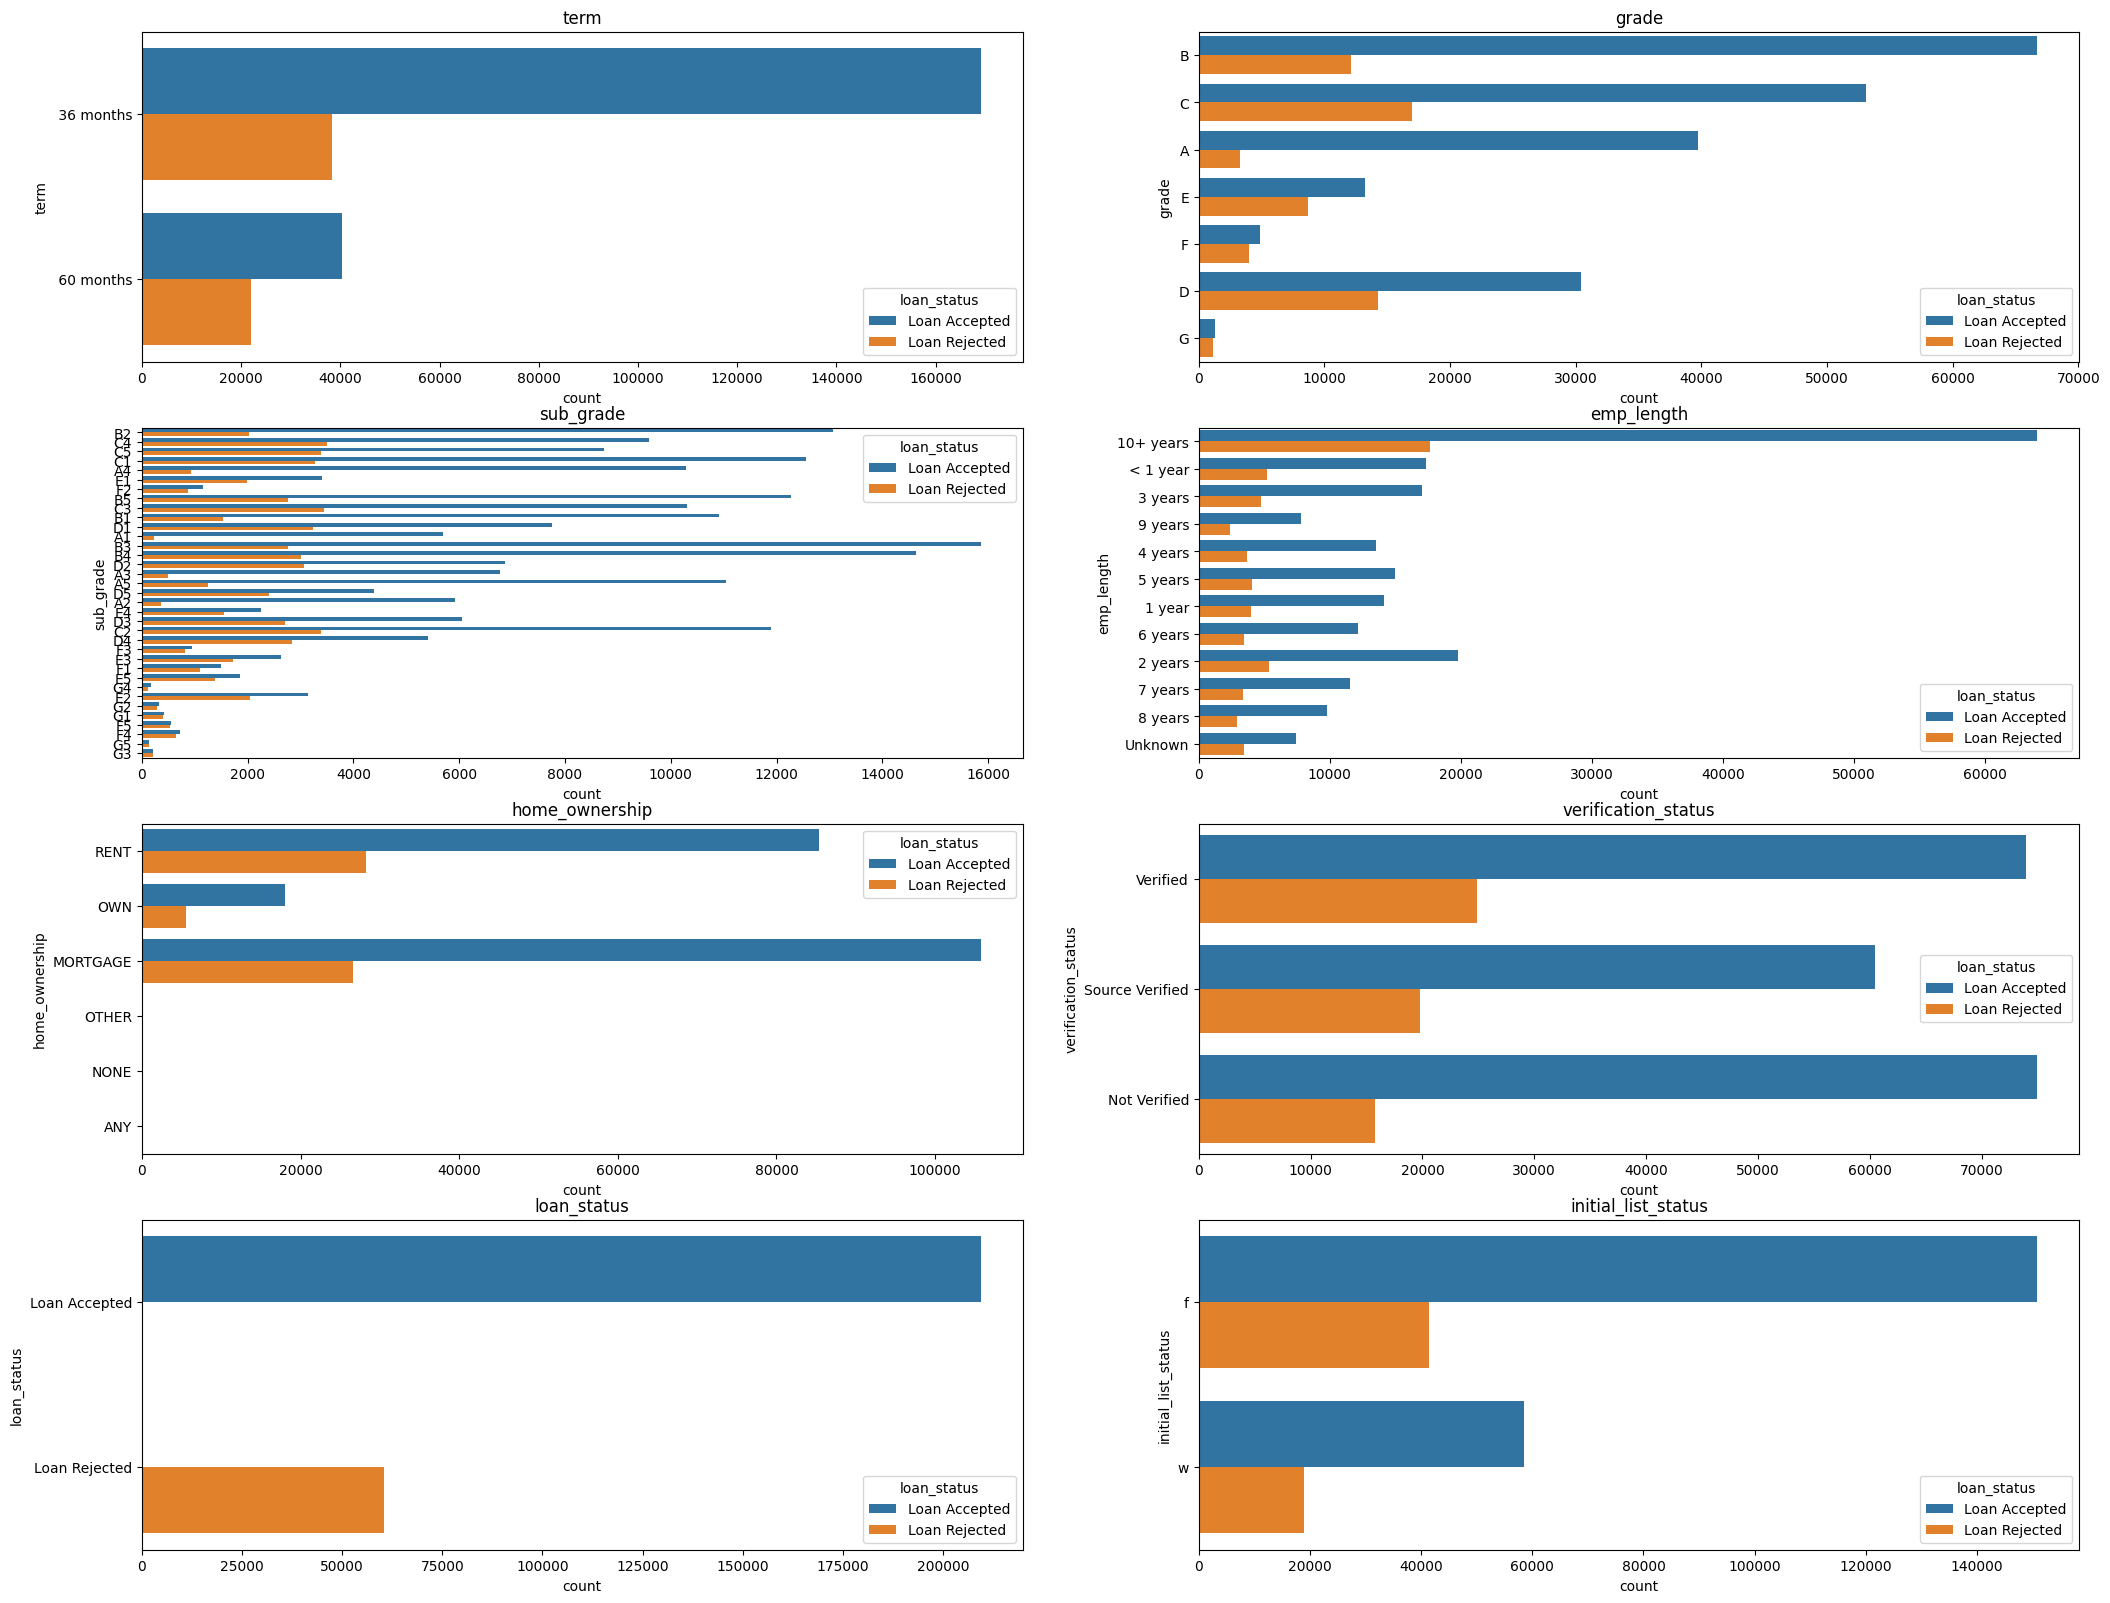

In [ ]:
nrows = 6
ncols = 2
iterator = 1
plt.figure(figsize = (25,30))
for i in df.select_dtypes(exclude = np.number).columns:
  plt.subplot(nrows,ncols,iterator)
  sns.countplot(y = df[i], hue = df['loan_status'])
  plt.xticks(rotation = 0)
  plt.title(i)
  iterator+=1
plt.show()

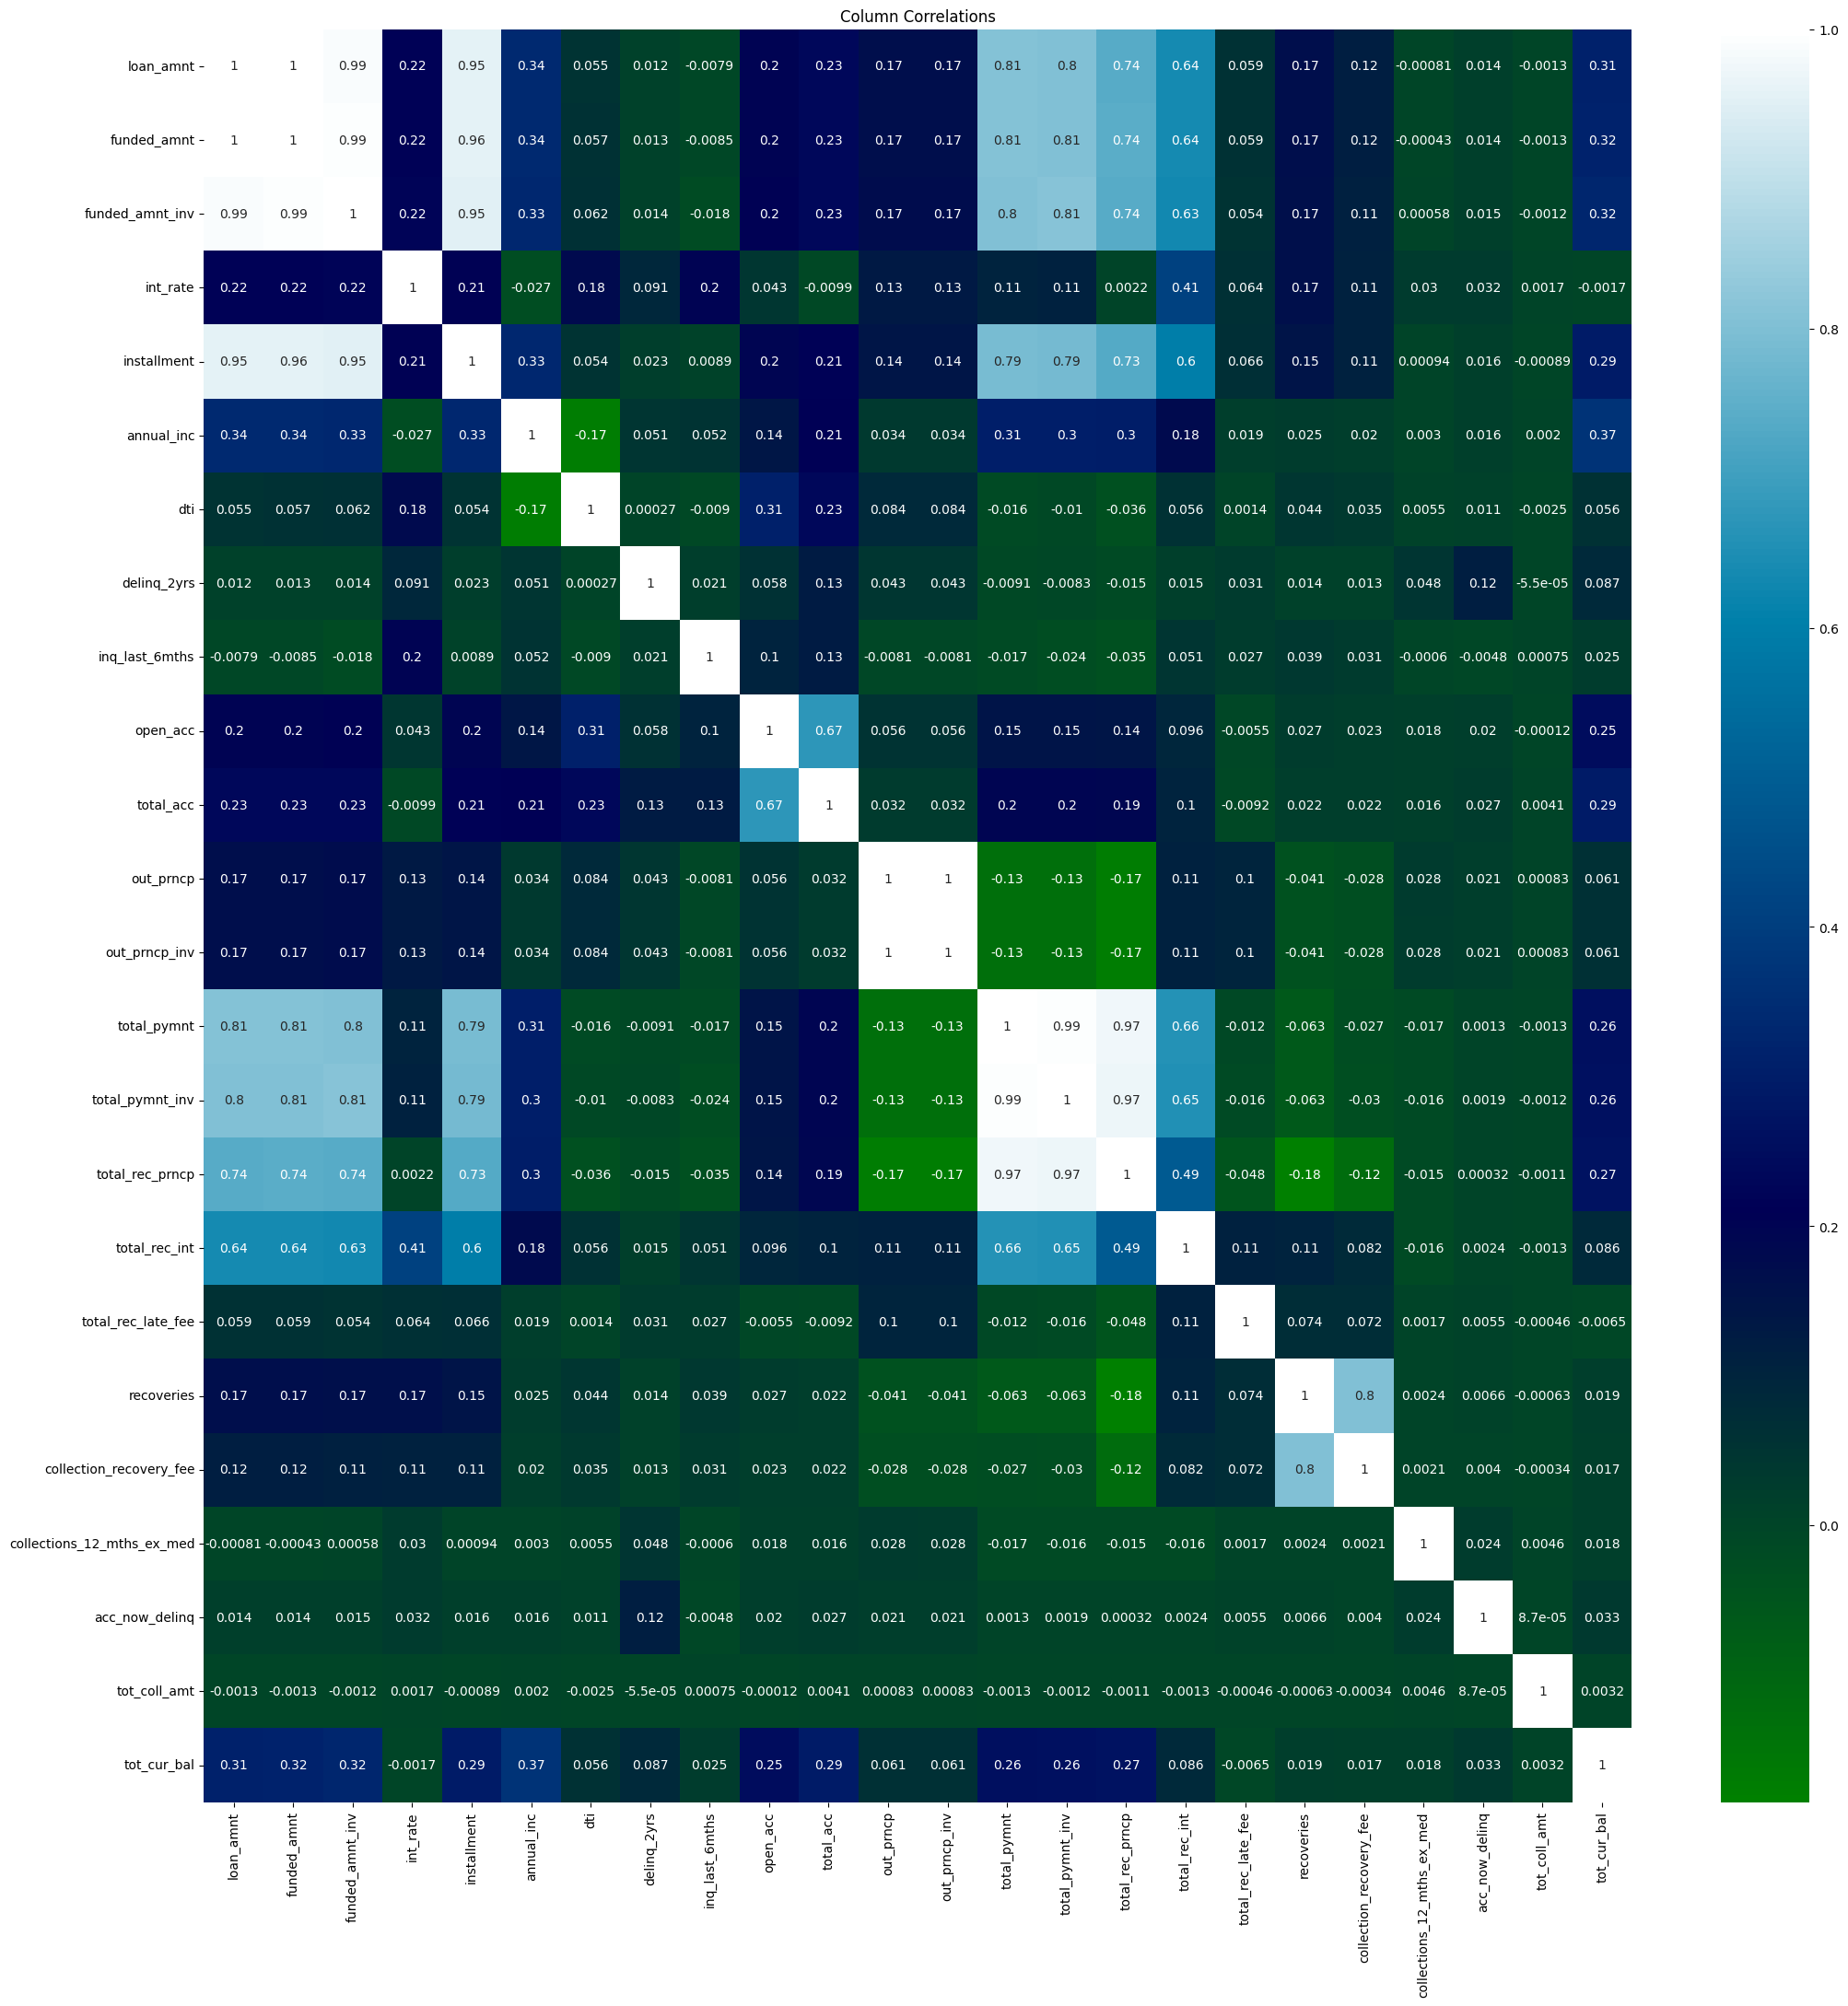

In [ ]:
cor = df.corr()
plt.figure(figsize = (25, 25))
sns.heatmap(cor, annot = True, cmap =  'ocean')
plt.title('Column Correlations')
plt.show()

In [ ]:
exclude = ['loan_status']
for i in df.select_dtypes(exclude = 'O'):
  for j in df.select_dtypes(exclude = np.number):
    if i not in exclude:
      if j not in exclude:
        plt.figure(figsize = (10,5))
        sns.boxplot(x = df[i], y = df[j])
        plt.xticks(rotation = 0)
        plt.title(i)
        plt.show()

In [ ]:
numeric_cols = list(df.select_dtypes(exclude = 'O').columns)
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
       x_col = numeric_cols[i]
       y_col = numeric_cols[j]
       sns.scatterplot(x = x_col, y = y_col, data = df, hue = 'loan_status')
       plt.title(f'{x_col} vs {y_col}')
       plt.show()

In [ ]:
for i in df.select_dtypes(exclude = 'O'):
  print(i, df[i].skew())

loan_amnt 0.8261846774674454
funded_amnt 0.8329520790425097
funded_amnt_inv 0.8282588724967633
int_rate 0.33676579509304483
installment 1.0050718268616923
annual_inc 39.56754344787368
dti 0.21218914715502032
delinq_2yrs 5.812221434375313
inq_last_6mths 2.2537865245798567
open_acc 1.1506227129680684
total_acc 0.8140880795107632
out_prncp 6.044815229805326
out_prncp_inv 6.044719247964279
total_pymnt 1.0904187947312391
total_pymnt_inv 1.0910743893770887
total_rec_prncp 0.957779161438677
total_rec_int 2.605021547375437
total_rec_late_fee 11.677389157821533
recoveries 9.90342859780501
collection_recovery_fee 16.559232031427204
collections_12_mths_ex_med 15.558527639294207
acc_now_delinq 23.383947833354373
tot_coll_amt 514.3048944143997
tot_cur_bal 3.4374735747361


In [ ]:
df_v1 = df.copy()

In [ ]:
df_v1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,5831.78,5000.00,861.07,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,0.0,0.0,0.0,0.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,3003.65,2400.00,603.65,0.00,0.00,0.00,0.0,0.0,0.0,0.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,0.0,0.0,0.0,0.0
4,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,5631.38,5000.00,631.38,0.00,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
df_v1['home_ownership'].value_counts()

MORTGAGE    132319
RENT        113621
OWN          23614
OTHER          177
NONE            42
ANY              1
Name: home_ownership, dtype: int64

In [ ]:
joint = df_v1[df_v1['home_ownership'] == 'OTHER']
df_v1.drop(index = joint.index, axis = 0, inplace = True)

In [ ]:
joint = df_v1[df_v1['home_ownership'] == 'NONE']
df_v1.drop(index = joint.index, axis = 0, inplace = True)

In [ ]:
joint = df_v1[df_v1['home_ownership'] == 'ANY']
df_v1.drop(index = joint.index, axis = 0, inplace = True)

In [ ]:
df_v1['home_ownership'].value_counts()

MORTGAGE    132319
RENT        113621
OWN          23614
Name: home_ownership, dtype: int64

In [ ]:
for i in df_v1.select_dtypes(exclude = 'O'):
  df_v1[i] = power_transform(df_v1[[i]])

In [ ]:
for i in df_v1.select_dtypes(exclude = 'O'):
  print(i, df_v1[i].skew())

loan_amnt -0.03631872467891242
funded_amnt -0.035563969269041346
funded_amnt_inv -0.022061849188325686
int_rate -0.02500057165529
installment -0.015272486603397103
annual_inc -0.013328184511462273
dti -0.0773874354831764
delinq_2yrs 1.807563936021096
inq_last_6mths 0.2144928170437268
open_acc 0.0021624805971836147
total_acc -0.01031976323299871
out_prncp 3.8814650958004457
out_prncp_inv 3.881465095427567
total_pymnt -0.038438138635374645
total_pymnt_inv -0.03506633968110814
total_rec_prncp -0.08371453071630812
total_rec_int 0.010427532571775101
total_rec_late_fee 5.3359911370439566
recoveries 2.865989788059241
collection_recovery_fee 2.967504885133297
collections_12_mths_ex_med 12.032880890275628
acc_now_delinq 17.734219389416946
tot_coll_amt 2.888536715684071
tot_cur_bal -0.5013148889135229


In [ ]:
for i in df_v1.select_dtypes(exclude = np.number):
  print(i)

term
grade
sub_grade
emp_length
home_ownership
verification_status
loan_status
initial_list_status


In [ ]:
df_v1['loan_status'].value_counts()

Loan Accepted    209231
Loan Rejected     60323
Name: loan_status, dtype: int64

In [ ]:
df_v1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal'],
      dtype='object')

In [ ]:
df_v1['loan_status'].replace(to_replace = ['Loan Accepted', 'Loan Rejected'], value = [0, 1], inplace = True)

In [ ]:
X = df_v1.drop(columns = 'loan_status')
y = df_v1['loan_status']

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,emp_length_< 1 year,emp_length_Unknown,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w
0,-1.181127,-1.178468,-1.136316,-0.695689,-1.178897,-1.895861,1.337421,-0.444125,0.589412,-2.337681,...,0,0,0,0,1,0,0,1,1,0
1,-1.890232,-1.889661,-1.783134,0.381032,-2.227722,-1.437128,-2.320760,-0.444125,1.862590,-2.337681,...,1,0,0,0,1,0,1,0,1,0
2,-1.926916,-1.926471,-1.816145,0.527538,-1.907552,-3.327752,-1.005635,-0.444125,1.187526,-2.926325,...,0,0,0,0,1,1,0,0,1,0
3,-0.279401,-0.274925,-0.267949,-0.012387,-0.151883,-0.448391,0.462971,-0.444125,0.589412,-0.042959,...,0,0,0,0,1,0,1,0,1,0
4,-1.181127,-1.178468,-1.130913,-1.445167,-1.228124,-1.068244,-0.655831,-0.444125,1.511845,-0.275067,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(215643, 88)
(215643,)
(53911, 88)
(53911,)


In [ ]:
def print_metrics(y_test,y_pred,model):
    print(f'Metrics for the model {model}')
    print('')
    print(f'Accuracy Score is {accuracy_score(y_test, y_pred)}')
    print(f'Recall Score is {recall_score(y_test, y_pred)}')
    print(f'Precision Score is {precision_score(y_test, y_pred)}')
    print(f'F1 Score is {f1_score(y_test, y_pred)}')
    print(f'ROC Score is {roc_auc_score(y_test, y_pred)}')
    print('Confusion Matrix')
    print(confusion_matrix(y_test,y_pred))
    print('Classification Report')
    print(classification_report(y_test,y_pred))

## Base Models

In [ ]:
clfs = {'KNN' : KNeighborsClassifier(), 'NaiveBayes':GaussianNB(), 'Logregs':LogisticRegression(), 'Decision Tree':DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'Ada Boost' : AdaBoostClassifier(), 'Gradient Boost' : GradientBoostingClassifier(), 'Support Vector Machine' : SVC(), 'XGB' : XGBClassifier()}
models_report = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
  if clf_name != 'XGB':
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_train, y_pred), 'Precision' : precision_score(y_train, y_pred), 'Recall' : recall_score(y_train, y_pred), 'F1 Score' : recall_score(y_train, y_pred)}
    models_report = models_report.append(t, ignore_index = True)
  else:
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train.values, y_train.values)
    y_pred = clf.predict(X_train)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_train, y_pred), 'Precision' : precision_score(y_train, y_pred), 'Recall' : recall_score(y_train, y_pred), 'F1 Score' : recall_score(y_train, y_pred)}
    models_report = models_report.append(t, ignore_index = True)
base_train_models_report = models_report.sort_values(by = 'F1 Score', ascending = False)
base_train_models_report

Fitting the Model - KNN
Fitting the Model - NaiveBayes
Fitting the Model - Logregs
Fitting the Model - Decision Tree
Fitting the Model - Random Forest
Fitting the Model - Ada Boost
Fitting the Model - Gradient Boost
Fitting the Model - Support Vector Machine
Fitting the Model - XGB


,Model,Accuracy,Precision,Recall,F1 Score
3,Decision Tree,1.000000,1.000000,1.000000,1.000000
4,Random Forest,1.000000,1.000000,1.000000,1.000000
8,XGB,0.999105,0.996729,0.999274,0.999274
7,Support Vector Machine,0.996916,0.992966,0.993234,0.993234
6,Gradient Boost,0.994969,0.993876,0.983541,0.983541
2,Logregs,0.994885,0.993563,0.983478,0.983478
5,Ada Boost,0.988384,0.994586,0.953195,0.953195
0,KNN,0.981506,0.994827,0.922020,0.922020
1,NaiveBayes,0.906317,0.871748,0.680857,0.680857


In [ ]:
clfs = {'KNN' : KNeighborsClassifier(), 'NaiveBayes':GaussianNB(), 'Logregs':LogisticRegression(), 'Decision Tree':DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'Ada Boost' : AdaBoostClassifier(), 'Gradient Boost' : GradientBoostingClassifier(), 'Support Vector Machine' : SVC(), 'XGB' : XGBClassifier()}
models_report = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
  if clf_name != 'XGB':
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Precision' : precision_score(y_test, y_pred), 'Recall' : recall_score(y_test, y_pred), 'F1 Score' : recall_score(y_test, y_pred)}
    models_report = models_report.append(t, ignore_index = True)
  else:
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train.values, y_train.values)
    y_pred = clf.predict(X_test)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Precision' : precision_score(y_test, y_pred), 'Recall' : recall_score(y_test, y_pred), 'F1 Score' : recall_score(y_test, y_pred)}
    models_report = models_report.append(t, ignore_index = True)
base_test_models_report = models_report.sort_values(by = 'F1 Score', ascending = False)
base_test_models_report

Fitting the Model - KNN
Fitting the Model - NaiveBayes
Fitting the Model - Logregs
Fitting the Model - Decision Tree
Fitting the Model - Random Forest
Fitting the Model - Ada Boost
Fitting the Model - Gradient Boost
Fitting the Model - Support Vector Machine
Fitting the Model - XGB


,Model,Accuracy,Precision,Recall,F1 Score
8,XGB,0.997255,0.992447,0.995389,0.995389
7,Support Vector Machine,0.996902,0.992678,0.993577,0.993577
4,Random Forest,0.996235,0.992656,0.990613,0.990613
3,Decision Tree,0.995010,0.990338,0.987484,0.987484
2,Logregs,0.994714,0.993098,0.983366,0.983366
6,Gradient Boost,0.994472,0.993172,0.982213,0.982213
5,Ada Boost,0.986626,0.993434,0.946887,0.946887
0,KNN,0.975608,0.991914,0.899045,0.899045
1,NaiveBayes,0.905400,0.869880,0.682065,0.682065


## Addressing the Target Column Imbalance and Rebuilding the models

### SMOTE

In [ ]:
smt = SMOTE()
X_new, y_new = smt.fit_resample(X, y)
y_new.value_counts()

NameError: name 'X' is not defined

In [ ]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_new, y_new, test_size = 0.20, random_state = 10)
print(X_train_os.shape)
print(y_train_os.shape)
print(X_test_os.shape)
print(y_test_os.shape)

NameError: name 'X_new' is not defined

In [ ]:
clfs = {'KNN' : KNeighborsClassifier(), 'NaiveBayes':GaussianNB(), 'Logregs':LogisticRegression(), 'Decision Tree':DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'Ada Boost' : AdaBoostClassifier(), 'Gradient Boost' : GradientBoostingClassifier(), 'Support Vector Machine' : SVC(), 'XGB' : XGBClassifier()}
models_report = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
  if clf_name != 'XGB':
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_os, y_train_os)
    y_pred_os = clf.predict(X_train_os)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_train_os, y_pred_os), 'Precision' : precision_score(y_train_os, y_pred_os), 'Recall' : recall_score(y_train_os, y_pred_os), 'F1 Score' : recall_score(y_train_os, y_pred_os)}
    models_report = models_report.append(t, ignore_index = True)
  else:
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_os.values, y_train_os.values)
    y_pred_os = clf.predict(X_train_os)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_train_os, y_pred_os), 'Precision' : precision_score(y_train_os, y_pred_os), 'Recall' : recall_score(y_train_os, y_pred_os), 'F1 Score' : recall_score(y_train_os, y_pred_os)}
    models_report = models_report.append(t, ignore_index = True)
smote_train_models_report = models_report.sort_values(by = 'F1 Score', ascending = False)
smote_train_models_report

Fitting the Model - KNN
Fitting the Model - NaiveBayes
Fitting the Model - Logregs
Fitting the Model - Decision Tree
Fitting the Model - Random Forest
Fitting the Model - Ada Boost
Fitting the Model - Gradient Boost
Fitting the Model - Support Vector Machine
Fitting the Model - XGB


,Model,Accuracy,Precision,Recall,F1 Score
3,Decision Tree,1.000000,1.000000,1.000000,1.000000
4,Random Forest,1.000000,1.000000,1.000000,1.000000
8,XGB,0.999214,0.998768,0.999659,0.999659
7,Support Vector Machine,0.998076,0.997906,0.998241,0.998241
0,KNN,0.992437,0.987829,0.997134,0.997134
2,Logregs,0.996577,0.998049,0.995087,0.995087
6,Gradient Boost,0.995203,0.997996,0.992382,0.992382
5,Ada Boost,0.988700,0.997909,0.979415,0.979415
1,NaiveBayes,0.827744,0.971011,0.675078,0.675078


In [ ]:
clfs = {'KNN' : KNeighborsClassifier(), 'NaiveBayes':GaussianNB(), 'Logregs':LogisticRegression(), 'Decision Tree':DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'Ada Boost' : AdaBoostClassifier(), 'Gradient Boost' : GradientBoostingClassifier(), 'Support Vector Machine' : SVC(), 'XGB' : XGBClassifier()}
models_report = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
  if clf_name != 'XGB':
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_os, y_train_os)
    y_pred_os = clf.predict(X_test_os)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_test_os, y_pred_os), 'Precision' : precision_score(y_test_os, y_pred_os), 'Recall' : recall_score(y_test_os, y_pred_os), 'F1 Score' : recall_score(y_test_os, y_pred_os)}
    models_report = models_report.append(t, ignore_index = True)
  else:
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_os.values, y_train_os.values)
    y_pred_os = clf.predict(X_test_os)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_test_os, y_pred_os), 'Precision' : precision_score(y_test_os, y_pred_os), 'Recall' : recall_score(y_test_os, y_pred_os), 'F1 Score' : recall_score(y_test_os, y_pred_os)}
    models_report = models_report.append(t, ignore_index = True)
smote_test_models_report = models_report.sort_values(by = 'F1 Score', ascending = False)
smote_test_models_report

Fitting the Model - KNN
Fitting the Model - NaiveBayes
Fitting the Model - Logregs
Fitting the Model - Decision Tree
Fitting the Model - Random Forest
Fitting the Model - Ada Boost
Fitting the Model - Gradient Boost
Fitting the Model - Support Vector Machine
Fitting the Model - XGB


,Model,Accuracy,Precision,Recall,F1 Score
8,XGB,0.998267,0.998030,0.998528,0.998528
7,Support Vector Machine,0.998100,0.998077,0.998148,0.998148
4,Random Forest,0.997849,0.998076,0.997650,0.997650
3,Decision Tree,0.996750,0.997125,0.996415,0.996415
2,Logregs,0.996654,0.998238,0.995109,0.995109
0,KNN,0.988195,0.983156,0.993566,0.993566
6,Gradient Boost,0.994970,0.998113,0.991880,0.991880
5,Ada Boost,0.988434,0.997943,0.979036,0.979036
1,NaiveBayes,0.826043,0.970758,0.674668,0.674668


### Undersampling

In [ ]:
# count the number of instances in each class
print("Original dataset shape:", Counter(y))

# apply random undersampling to the dataset
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# count the number of instances in each class after applying random undersampling
print("Resampled dataset shape:", Counter(y_res))

Original dataset shape: Counter({0: 209231, 1: 60323})
Resampled dataset shape: Counter({0: 60323, 1: 60323})


In [ ]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_res, y_res, test_size = 0.20, random_state = 42)
print(X_train_us.shape)
print(y_train_us.shape)
print(X_test_us.shape)
print(y_test_us.shape)

(96516, 88)
(96516,)
(24130, 88)
(24130,)


In [ ]:
clfs = {'KNN' : KNeighborsClassifier(), 'NaiveBayes':GaussianNB(), 'Logregs':LogisticRegression(), 'Decision Tree':DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'Ada Boost' : AdaBoostClassifier(), 'Gradient Boost' : GradientBoostingClassifier(), 'Support Vector Machine' : SVC(), 'XGB' : XGBClassifier()}
models_report = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
  if clf_name != 'XGB':
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_us, y_train_us)
    y_pred_us = clf.predict(X_train_us)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_train_us, y_pred_us), 'Precision' : precision_score(y_train_us, y_pred_us), 'Recall' : recall_score(y_train_us, y_pred_us), 'F1 Score' : recall_score(y_train_us, y_pred_us)}
    models_report = models_report.append(t, ignore_index = True)
  else:
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_us.values, y_train_us.values)
    y_pred_us = clf.predict(X_train_us)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_train_us, y_pred_us), 'Precision' : precision_score(y_train_us, y_pred_us), 'Recall' : recall_score(y_train_us, y_pred_us), 'F1 Score' : recall_score(y_train_us, y_pred_us)}
    models_report = models_report.append(t, ignore_index = True)
randomundersamp_train_models_report = models_report.sort_values(by = 'F1 Score', ascending = False)
randomundersamp_train_models_report

Fitting the Model - KNN
Fitting the Model - NaiveBayes
Fitting the Model - Logregs
Fitting the Model - Decision Tree
Fitting the Model - Random Forest
Fitting the Model - Ada Boost
Fitting the Model - Gradient Boost
Fitting the Model - Support Vector Machine
Fitting the Model - XGB


,Model,Accuracy,Precision,Recall,F1 Score
3,Decision Tree,1.000000,1.000000,1.000000,1.000000
4,Random Forest,1.000000,1.000000,1.000000,1.000000
8,XGB,0.999772,0.999690,0.999855,0.999855
7,Support Vector Machine,0.996519,0.998156,0.994898,0.994898
2,Logregs,0.995255,0.998234,0.992295,0.992295
6,Gradient Boost,0.994364,0.998334,0.990415,0.990415
5,Ada Boost,0.986210,0.997948,0.974510,0.974510
0,KNN,0.974916,0.994963,0.954824,0.954824
1,NaiveBayes,0.824506,0.957071,0.680651,0.680651


In [ ]:
clfs = {'KNN' : KNeighborsClassifier(), 'NaiveBayes':GaussianNB(), 'Logregs':LogisticRegression(), 'Decision Tree':DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'Ada Boost' : AdaBoostClassifier(), 'Gradient Boost' : GradientBoostingClassifier(), 'Support Vector Machine' : SVC(), 'XGB' : XGBClassifier()}
models_report = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
  if clf_name != 'XGB':
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_us, y_train_us)
    y_pred_us = clf.predict(X_test_us)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_test_us, y_pred_us), 'Precision' : precision_score(y_test_us, y_pred_us), 'Recall' : recall_score(y_test_us, y_pred_us), 'F1 Score' : recall_score(y_test_us, y_pred_us)}
    models_report = models_report.append(t, ignore_index = True)
  else:
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_us.values, y_train_us.values)
    y_pred_us = clf.predict(X_test_us)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_test_us, y_pred_us), 'Precision' : precision_score(y_test_us, y_pred_us), 'Recall' : recall_score(y_test_us, y_pred_us), 'F1 Score' : recall_score(y_test_us, y_pred_us)}
    models_report = models_report.append(t, ignore_index = True)
randomundersamp_test_models_report = models_report.sort_values(by = 'F1 Score', ascending = False)
randomundersamp_test_models_report

Fitting the Model - KNN
Fitting the Model - NaiveBayes
Fitting the Model - Logregs
Fitting the Model - Decision Tree
Fitting the Model - Random Forest
Fitting the Model - Ada Boost
Fitting the Model - Gradient Boost
Fitting the Model - Support Vector Machine
Fitting the Model - XGB


,Model,Accuracy,Precision,Recall,F1 Score
8,XGB,0.997016,0.997730,0.996222,0.996222
7,Support Vector Machine,0.996063,0.997558,0.994459,0.994459
3,Decision Tree,0.994654,0.995042,0.994124,0.994124
4,Random Forest,0.995441,0.997555,0.993200,0.993200
2,Logregs,0.994820,0.997720,0.991773,0.991773
6,Gradient Boost,0.993991,0.997800,0.990010,0.990010
5,Ada Boost,0.986407,0.997680,0.974731,0.974731
0,KNN,0.968255,0.990927,0.944342,0.944342
1,NaiveBayes,0.829010,0.954896,0.686031,0.686031


## Base Model after removing columns which provides info on loan repayments

In [ ]:
df_v2 = df_v1.drop(columns = ['funded_amnt', 'funded_amnt_inv', 'sub_grade', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'tot_coll_amt', 'total_pymnt', 'total_pymnt_inv'])
df_v2.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,total_acc,initial_list_status,acc_now_delinq,tot_cur_bal
0,-1.181127,36 months,-0.695689,-1.178897,B,10+ years,RENT,-1.895861,Verified,0,1.337421,-0.444125,0.589412,-2.337681,-1.635283,f,-0.05621,-1.556732
1,-1.890232,60 months,0.381032,-2.227722,C,< 1 year,RENT,-1.437128,Source Verified,1,-2.320760,-0.444125,1.862590,-2.337681,-2.597502,f,-0.05621,-1.556732
2,-1.926916,36 months,0.527538,-1.907552,C,10+ years,RENT,-3.327752,Not Verified,0,-1.005635,-0.444125,1.187526,-2.926325,-1.483564,f,-0.05621,-1.556732
3,-0.279401,36 months,-0.012387,-0.151883,C,10+ years,RENT,-0.448391,Source Verified,0,0.462971,-0.444125,0.589412,-0.042959,1.034872,f,-0.05621,-1.556732
4,-1.181127,36 months,-1.445167,-1.228124,A,3 years,RENT,-1.068244,Source Verified,0,-0.655831,-0.444125,1.511845,-0.275067,-1.204991,f,-0.05621,-1.556732


In [ ]:
X = df_v2.drop(columns = 'loan_status')
y = df_v2['loan_status']

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,total_acc,acc_now_delinq,...,emp_length_< 1 year,emp_length_Unknown,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w
0,-1.181127,-0.695689,-1.178897,-1.895861,1.337421,-0.444125,0.589412,-2.337681,-1.635283,-0.05621,...,0,0,0,0,1,0,0,1,1,0
1,-1.890232,0.381032,-2.227722,-1.437128,-2.320760,-0.444125,1.862590,-2.337681,-2.597502,-0.05621,...,1,0,0,0,1,0,1,0,1,0
2,-1.926916,0.527538,-1.907552,-3.327752,-1.005635,-0.444125,1.187526,-2.926325,-1.483564,-0.05621,...,0,0,0,0,1,1,0,0,1,0
3,-0.279401,-0.012387,-0.151883,-0.448391,0.462971,-0.444125,0.589412,-0.042959,1.034872,-0.05621,...,0,0,0,0,1,0,1,0,1,0
4,-1.181127,-1.445167,-1.228124,-1.068244,-0.655831,-0.444125,1.511845,-0.275067,-1.204991,-0.05621,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(215643, 40)
(215643,)
(53911, 40)
(53911,)


In [ ]:
clfs = {'KNN' : KNeighborsClassifier(), 'NaiveBayes':GaussianNB(), 'Logregs':LogisticRegression(), 'Decision Tree':DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'Ada Boost' : AdaBoostClassifier(), 'Gradient Boost' : GradientBoostingClassifier(), 'XGB' : XGBClassifier()}
models_report = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
  if clf_name != 'XGB':
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_train, y_pred), 'Precision' : precision_score(y_train, y_pred), 'Recall' : recall_score(y_train, y_pred), 'F1 Score' : recall_score(y_train, y_pred)}
    models_report = models_report.append(t, ignore_index = True)
  else:
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train.values, y_train.values)
    y_pred = clf.predict(X_train)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_train, y_pred), 'Precision' : precision_score(y_train, y_pred), 'Recall' : recall_score(y_train, y_pred), 'F1 Score' : recall_score(y_train, y_pred)}
    models_report = models_report.append(t, ignore_index = True)
base_train_models_report = models_report.sort_values(by = 'F1 Score', ascending = False)
base_train_models_report

Fitting the Model - KNN
Fitting the Model - NaiveBayes
Fitting the Model - Logregs
Fitting the Model - Decision Tree
Fitting the Model - Random Forest
Fitting the Model - Ada Boost
Fitting the Model - Gradient Boost
Fitting the Model - XGB


,Model,Accuracy,Precision,Recall,F1 Score
3,Decision Tree,1.000000,1.000000,1.000000,1.000000
4,Random Forest,0.999991,1.000000,0.999958,0.999958
1,NaiveBayes,0.722170,0.386780,0.415970,0.415970
0,KNN,0.815923,0.668869,0.348741,0.348741
7,XGB,0.795361,0.685236,0.155483,0.155483
6,Gradient Boost,0.781375,0.568296,0.089292,0.089292
5,Ada Boost,0.779993,0.547107,0.088711,0.088711
2,Logregs,0.780526,0.557883,0.085120,0.085120


In [ ]:
clfs = {'KNN' : KNeighborsClassifier(), 'NaiveBayes':GaussianNB(), 'Logregs':LogisticRegression(), 'Decision Tree':DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'Ada Boost' : AdaBoostClassifier(), 'Gradient Boost' : GradientBoostingClassifier(), 'XGB' : XGBClassifier()}
models_report = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
  if clf_name != 'XGB':
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Precision' : precision_score(y_test, y_pred), 'Recall' : recall_score(y_test, y_pred), 'F1 Score' : recall_score(y_test, y_pred)}
    models_report = models_report.append(t, ignore_index = True)
  else:
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train.values, y_train.values)
    y_pred = clf.predict(X_test)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Precision' : precision_score(y_test, y_pred), 'Recall' : recall_score(y_test, y_pred), 'F1 Score' : recall_score(y_test, y_pred)}
    models_report = models_report.append(t, ignore_index = True)
base_test_models_report = models_report.sort_values(by = 'F1 Score', ascending = False)
base_test_models_report

Fitting the Model - KNN
Fitting the Model - NaiveBayes
Fitting the Model - Logregs
Fitting the Model - Decision Tree
Fitting the Model - Random Forest
Fitting the Model - Ada Boost
Fitting the Model - Gradient Boost
Fitting the Model - XGB


,Model,Accuracy,Precision,Recall,F1 Score
1,NaiveBayes,0.722023,0.389913,0.414443,0.414443
3,Decision Tree,0.681382,0.306438,0.328063,0.328063
0,KNN,0.748771,0.387279,0.198040,0.198040
7,XGB,0.777745,0.530497,0.116024,0.116024
4,Random Forest,0.776539,0.519117,0.108449,0.108449
5,Ada Boost,0.778394,0.549672,0.089756,0.089756
2,Logregs,0.779340,0.565195,0.088521,0.088521
6,Gradient Boost,0.778709,0.556554,0.086709,0.086709


## Addressing the Target Column Imbalance and Rebuilding the models

### SMOTE

In [ ]:
smt = SMOTE()
X_new, y_new = smt.fit_resample(X, y)
y_new.value_counts()

0    209231
1    209231
Name: loan_status, dtype: int64

In [ ]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_new, y_new, test_size = 0.20, random_state = 10)
print(X_train_os.shape)
print(y_train_os.shape)
print(X_test_os.shape)
print(y_test_os.shape)

(334769, 40)
(334769,)
(83693, 40)
(83693,)


In [ ]:
clfs = {'KNN' : KNeighborsClassifier(), 'NaiveBayes':GaussianNB(), 'Logregs':LogisticRegression(), 'Decision Tree':DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'Ada Boost' : AdaBoostClassifier(), 'Gradient Boost' : GradientBoostingClassifier(), 'XGB' : XGBClassifier()}
models_report = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
  if clf_name != 'XGB':
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_os, y_train_os)
    y_pred_os = clf.predict(X_train_os)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_train_os, y_pred_os), 'Precision' : precision_score(y_train_os, y_pred_os), 'Recall' : recall_score(y_train_os, y_pred_os), 'F1 Score' : recall_score(y_train_os, y_pred_os)}
    models_report = models_report.append(t, ignore_index = True)
  else:
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_os.values, y_train_os.values)
    y_pred_os = clf.predict(X_train_os)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_train_os, y_pred_os), 'Precision' : precision_score(y_train_os, y_pred_os), 'Recall' : recall_score(y_train_os, y_pred_os), 'F1 Score' : recall_score(y_train_os, y_pred_os)}
    models_report = models_report.append(t, ignore_index = True)
smote_train_models_report = models_report.sort_values(by = 'F1 Score', ascending = False)
smote_train_models_report

Fitting the Model - KNN
Fitting the Model - NaiveBayes
Fitting the Model - Logregs
Fitting the Model - Decision Tree
Fitting the Model - Random Forest
Fitting the Model - Ada Boost
Fitting the Model - Gradient Boost
Fitting the Model - XGB


,Model,Accuracy,Precision,Recall,F1 Score
3,Decision Tree,1.000000,1.000000,1.000000,1.000000
4,Random Forest,1.000000,1.000000,1.000000,1.000000
0,KNN,0.835528,0.762802,0.973114,0.973114
7,XGB,0.854308,0.935444,0.760632,0.760632
6,Gradient Boost,0.756650,0.765462,0.738904,0.738904
5,Ada Boost,0.720954,0.717160,0.728181,0.728181
2,Logregs,0.752865,0.807478,0.662996,0.662996
1,NaiveBayes,0.657271,0.678128,0.596591,0.596591


In [ ]:
clfs = {'KNN' : KNeighborsClassifier(), 'NaiveBayes':GaussianNB(), 'Logregs':LogisticRegression(), 'Decision Tree':DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'Ada Boost' : AdaBoostClassifier(), 'Gradient Boost' : GradientBoostingClassifier(), 'XGB' : XGBClassifier()}
models_report = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
  if clf_name != 'XGB':
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_os, y_train_os)
    y_pred_os = clf.predict(X_test_os)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_test_os, y_pred_os), 'Precision' : precision_score(y_test_os, y_pred_os), 'Recall' : recall_score(y_test_os, y_pred_os), 'F1 Score' : recall_score(y_test_os, y_pred_os)}
    models_report = models_report.append(t, ignore_index = True)
  else:
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_os.values, y_train_os.values)
    y_pred_os = clf.predict(X_test_os)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_test_os, y_pred_os), 'Precision' : precision_score(y_test_os, y_pred_os), 'Recall' : recall_score(y_test_os, y_pred_os), 'F1 Score' : recall_score(y_test_os, y_pred_os)}
    models_report = models_report.append(t, ignore_index = True)
smote_test_models_report = models_report.sort_values(by = 'F1 Score', ascending = False)
smote_test_models_report

Fitting the Model - KNN
Fitting the Model - NaiveBayes
Fitting the Model - Logregs
Fitting the Model - Decision Tree
Fitting the Model - Random Forest
Fitting the Model - Ada Boost
Fitting the Model - Gradient Boost
Fitting the Model - XGB


,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.761521,0.694630,0.938889,0.938889
4,Random Forest,0.855806,0.865756,0.844421,0.844421
3,Decision Tree,0.762740,0.758289,0.775878,0.775878
7,XGB,0.843249,0.924475,0.749786,0.749786
6,Gradient Boost,0.756204,0.768962,0.737013,0.737013
5,Ada Boost,0.721757,0.722660,0.725594,0.725594
2,Logregs,0.754269,0.813267,0.664245,0.664245
1,NaiveBayes,0.656578,0.682262,0.594468,0.594468


### Undersampling

In [ ]:
# count the number of instances in each class
print("Original dataset shape:", Counter(y))

# apply random undersampling to the dataset
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# count the number of instances in each class after applying random undersampling
print("Resampled dataset shape:", Counter(y_res))

Original dataset shape: Counter({0: 209231, 1: 60323})
Resampled dataset shape: Counter({0: 60323, 1: 60323})


In [ ]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_res, y_res, test_size = 0.20, random_state = 42)
print(X_train_us.shape)
print(y_train_us.shape)
print(X_test_us.shape)
print(y_test_us.shape)

(96516, 40)
(96516,)
(24130, 40)
(24130,)


In [ ]:
clfs = {'KNN' : KNeighborsClassifier(), 'NaiveBayes':GaussianNB(), 'Logregs':LogisticRegression(), 'Decision Tree':DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'Ada Boost' : AdaBoostClassifier(), 'Gradient Boost' : GradientBoostingClassifier(), 'XGB' : XGBClassifier()}
models_report = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
  if clf_name != 'XGB':
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_us, y_train_us)
    y_pred_us = clf.predict(X_train_us)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_train_us, y_pred_us), 'Precision' : precision_score(y_train_us, y_pred_us), 'Recall' : recall_score(y_train_us, y_pred_us), 'F1 Score' : recall_score(y_train_us, y_pred_us)}
    models_report = models_report.append(t, ignore_index = True)
  else:
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_us.values, y_train_us.values)
    y_pred_us = clf.predict(X_train_us)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_train_us, y_pred_us), 'Precision' : precision_score(y_train_us, y_pred_us), 'Recall' : recall_score(y_train_us, y_pred_us), 'F1 Score' : recall_score(y_train_us, y_pred_us)}
    models_report = models_report.append(t, ignore_index = True)
randomundersamp_train_models_report = models_report.sort_values(by = 'F1 Score', ascending = False)
randomundersamp_train_models_report

Fitting the Model - KNN
Fitting the Model - NaiveBayes
Fitting the Model - Logregs
Fitting the Model - Decision Tree
Fitting the Model - Random Forest
Fitting the Model - Ada Boost
Fitting the Model - Gradient Boost
Fitting the Model - XGB


,Model,Accuracy,Precision,Recall,F1 Score
3,Decision Tree,1.000000,1.000000,1.000000,1.000000
4,Random Forest,1.000000,1.000000,1.000000,1.000000
0,KNN,0.735764,0.736253,0.737332,0.737332
7,XGB,0.709416,0.707016,0.718349,0.718349
6,Gradient Boost,0.657943,0.654697,0.673008,0.673008
2,Logregs,0.650203,0.645940,0.669703,0.669703
5,Ada Boost,0.651011,0.647516,0.667699,0.667699
1,NaiveBayes,0.627005,0.669832,0.505567,0.505567


In [ ]:
clfs = {'KNN' : KNeighborsClassifier(), 'NaiveBayes':GaussianNB(), 'Logregs':LogisticRegression(), 'Decision Tree':DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'Ada Boost' : AdaBoostClassifier(), 'Gradient Boost' : GradientBoostingClassifier(), 'XGB' : XGBClassifier()}
models_report = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
  if clf_name != 'XGB':
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_us, y_train_us)
    y_pred_us = clf.predict(X_test_us)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_test_us, y_pred_us), 'Precision' : precision_score(y_test_us, y_pred_us), 'Recall' : recall_score(y_test_us, y_pred_us), 'F1 Score' : recall_score(y_test_us, y_pred_us)}
    models_report = models_report.append(t, ignore_index = True)
  else:
    print(f'Fitting the Model - {clf_name}')
    clf.fit(X_train_us.values, y_train_us.values)
    y_pred_us = clf.predict(X_test_us)
    t = {'Model':clf_name, 'Accuracy': accuracy_score(y_test_us, y_pred_us), 'Precision' : precision_score(y_test_us, y_pred_us), 'Recall' : recall_score(y_test_us, y_pred_us), 'F1 Score' : recall_score(y_test_us, y_pred_us)}
    models_report = models_report.append(t, ignore_index = True)
randomundersamp_test_models_report = models_report.sort_values(by = 'F1 Score', ascending = False)
randomundersamp_test_models_report

Fitting the Model - KNN
Fitting the Model - NaiveBayes
Fitting the Model - Logregs
Fitting the Model - Decision Tree
Fitting the Model - Random Forest
Fitting the Model - Ada Boost
Fitting the Model - Gradient Boost
Fitting the Model - XGB


,Model,Accuracy,Precision,Recall,F1 Score
2,Logregs,0.644385,0.632445,0.667646,0.667646
5,Ada Boost,0.645877,0.635340,0.663449,0.663449
6,Gradient Boost,0.647949,0.638105,0.662693,0.662693
7,XGB,0.646001,0.637103,0.657320,0.657320
4,Random Forest,0.641608,0.634476,0.646407,0.646407
0,KNN,0.603771,0.597012,0.607287,0.607287
3,Decision Tree,0.560091,0.553396,0.564221,0.564221
1,NaiveBayes,0.625943,0.658085,0.504281,0.504281


Base Model Selected for SMOTE Oversampling

In [ ]:
rfc = RandomForestClassifier(random_state = 10)
rfc_model = rfc.fit(X_train_os, y_train_os)
ypred = rfc_model.predict(X_test_os)
print(classification_report(y_test_os, ypred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     41573
           1       0.87      0.85      0.86     42120

    accuracy                           0.86     83693
   macro avg       0.86      0.86      0.86     83693
weighted avg       0.86      0.86      0.86     83693



Base Model Selected for Random Undersampling

## Hyper Parameter Tunning

### Hyper Parameter Tuning Oversampling

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [100, 120, 140, 160, 180],
                     'max_depth': [10, 12, 14, 16, 18],
                     'max_features': ['sqrt', 'log2']}]
rscv = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 10), param_distributions = tuned_paramaters, n_jobs = -1)
rscv_grid_model = rf_grid.fit(X_train, y_train)
print('Best parameters for random forest classifier: ', rscv_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2', 'n_estimators': 140} 



In [ ]:
tuned_paramaters = [{'criterion': ['gini'],
                     'n_estimators': [146, 147, 148, 149, 150],
                     'max_depth': [13, 14, 15],
                     'max_features': ['log2']}]
random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification, param_grid = tuned_paramaters, cv = 5, n_jobs = -1)
rf_grid_model = rf_grid.fit(X_train, y_train)
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2', 'n_estimators': 148} 



In [ ]:
rfc = RandomForestClassifier(n_estimators = 148, criterion = 'gini', max_depth = 14, max_features = 'log2', random_state = 10)
rfc_model = rfc.fit(X_train_os, y_train_os)
ypred = rfc_model.predict(X_test_os)
print(classification_report(y_test_os, ypred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     41573
           1       0.74      0.75      0.74     42120

    accuracy                           0.74     83693
   macro avg       0.74      0.74      0.74     83693
weighted avg       0.74      0.74      0.74     83693



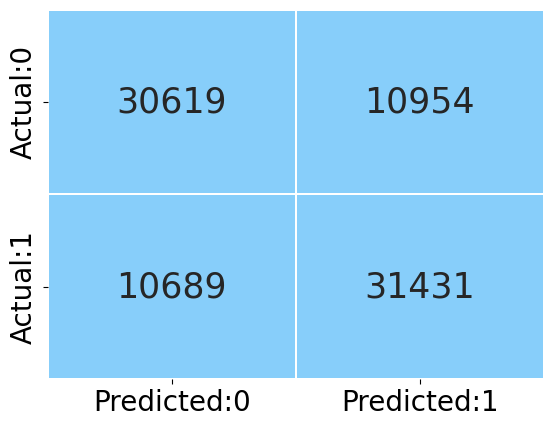

In [ ]:
cm = confusion_matrix(y_test_os, ypred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ['lightskyblue'], cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
ypred_proba = rfc_model.predict_proba(X_test_os)

In [ ]:
ypred_proba[::,0]

array([0.8308267 , 0.62005083, 0.28816307, ..., 0.57626641, 0.68134662,
       0.23362565])

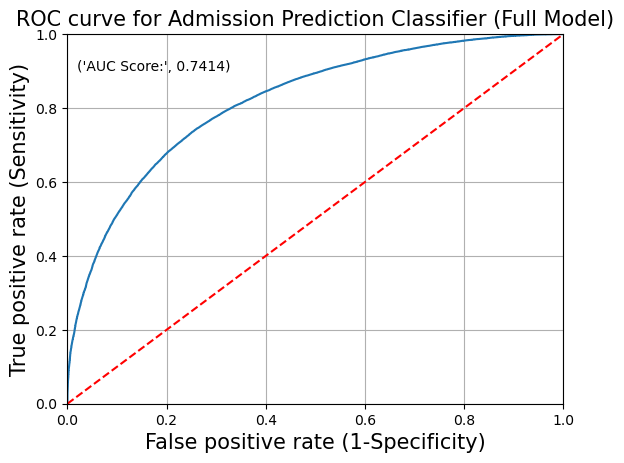

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_os, ypred_proba[::,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test_os, ypred),4)))
plt.grid(True)

In [ ]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.734663,0.250932,0.507023,0.483731
1,0.734734,0.251028,0.506992,0.483706
2,0.734592,0.250908,0.507049,0.483684
3,0.734687,0.251004,0.507014,0.483682
4,0.734758,0.251076,0.506980,0.483681


In [ ]:
y_pred_youden = [ 0 if x < 0.48 else 1 for x in ypred_proba[::,1]]

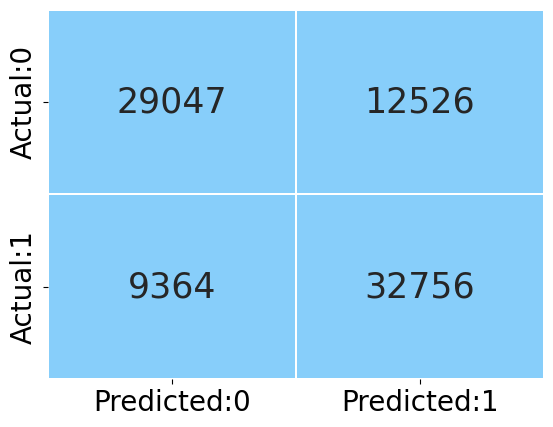

In [ ]:
cm = confusion_matrix(y_test_os, y_pred_youden)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ['lightskyblue'], cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
print(classification_report(y_test_os, y_pred_youden))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73     41573
           1       0.72      0.78      0.75     42120

    accuracy                           0.74     83693
   macro avg       0.74      0.74      0.74     83693
weighted avg       0.74      0.74      0.74     83693



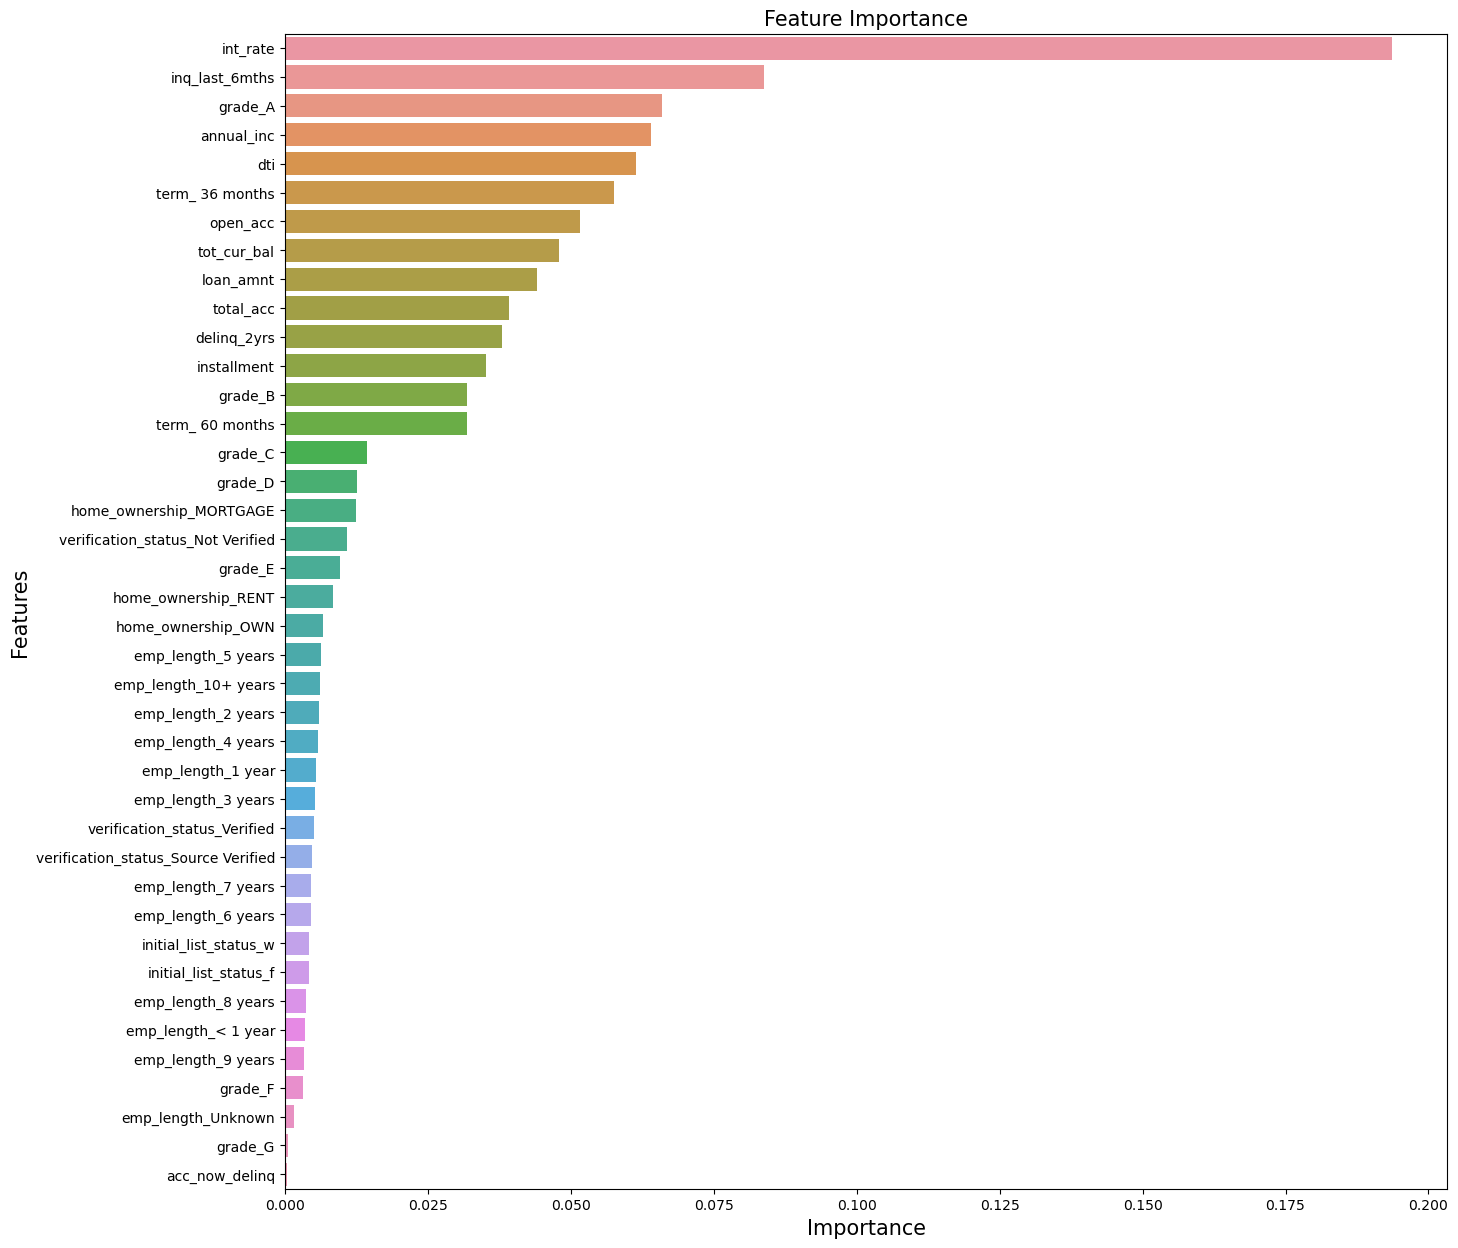

In [ ]:
important_features = pd.DataFrame({'Features': X_train_os.columns, 
                                   'Importance': rfc_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
plt.figure(figsize = (15,15))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()